In [2]:
from NtupleReader import *

## 1. Read HGCal Ntuple

In [2]:
reader = NtupleReader('partGun_PDGid15_x1000_E300.0To300.0_NTUP_1')
reader.getDataFrame(savePickle=True)
df = reader.df

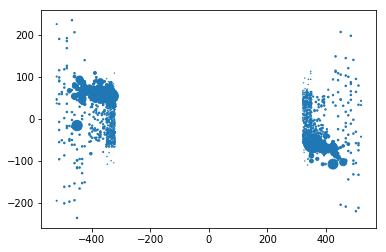

In [20]:
idx = 6
plt.figure(facecolor='w')
plt.scatter(np.r_[df.z[idx],df.z[-idx]],
            np.r_[df.x[idx],df.x[-idx]],
            s=50*np.r_[df.e[idx],df.e[-idx]],
            marker='o')

## 2. Read HGCal Geometry

In [3]:
from root_pandas import read_root

baseDir = common.getBaseDir(isLocal=False)
df = read_root(baseDir+'data/geom/6inch.root',
               'hgcaltriggergeomtester/TreeCells',
               columns=['x','y','z','wafertype','layer','zside','wafer'])
df = df.query('zside>0 & layer==10')
df.drop(columns=['zside','layer'])
df.reset_index(inplace=True)
df.to_pickle(baseDir+'data/geom/6inch_cell_layer10.pkl')